In [1]:
import warnings 
warnings.filterwarnings("ignore")

## Descriptive Statistics

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.DataFrame(np.random.rand(100,3), columns=list('abc'))

In [4]:
dataset.describe()

,a,b,c
count,100.000000,100.000000,100.000000
mean,0.481199,0.460217,0.454976
std,0.282780,0.282036,0.260415
min,0.005210,0.002666,0.011437
25%,0.260453,0.239380,0.260781
50%,0.493461,0.466462,0.459611
75%,0.714099,0.677027,0.657492
max,0.992458,0.999667,0.992778


## Inferential Statistics

### Sampling

##### Simple Random Sampling

In [5]:
import random

In [6]:
#without replacement
random.sample(list(range(50)),5)

[1, 35, 40, 0, 18]

In [7]:
#with replacement
random.choices(list(range(10)), weights=[5,5,4,3,2,1,1,1,1,1], k=5)

[1, 8, 0, 1, 2]

##### Stratified Sampling

In [8]:
rose_color = ["White","Red","Pink","Pink","Red","Blue","Blue","White","Black","Orange","Orange","Pink","Blue","Black"]

In [9]:
data = pd.DataFrame(rose_color, columns=["Color"])

In [10]:
data.groupby("Color", group_keys=False).apply(lambda x: x.sample(2, random_state=42))


,Color
13,Black
8,Black
5,Blue
6,Blue
10,Orange
9,Orange
2,Pink
3,Pink
4,Red
1,Red


##### Systematic Sampling

In [11]:
data = pd.DataFrame(list(range(50)), columns=["A"])

In [12]:
data["A"].iloc[3::10].values

array([ 3, 13, 23, 33, 43])

### Central Limit Theorem

In [13]:
data = range(300)

In [14]:
means = []
for i in range(10):
    sample_data = random.sample(data, k=30)
    means.append(np.mean(sample_data))
means

[np.float64(170.6),
 np.float64(154.36666666666667),
 np.float64(147.9),
 np.float64(170.93333333333334),
 np.float64(132.23333333333332),
 np.float64(182.46666666666667),
 np.float64(135.9),
 np.float64(145.93333333333334),
 np.float64(159.6),
 np.float64(147.9)]

In [15]:
print(f"""Mean of means: {np.mean(means)}
Mean of population: {np.mean(data)}""")

Mean of means: 154.78333333333336
Mean of population: 149.5


## Probability Distribution

##### Binomial

In [16]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [17]:
n = 5 #number of trials
p = 0.5 #probability of success
r_values = list(range(n+1)) #number of successes
dist = [binom.pmf(r,n,p) for r in r_values]
dist

[np.float64(0.03124999999999997),
 np.float64(0.15624999999999997),
 np.float64(0.3124999999999998),
 np.float64(0.3124999999999998),
 np.float64(0.15625),
 np.float64(0.03125)]

<BarContainer object of 6 artists>

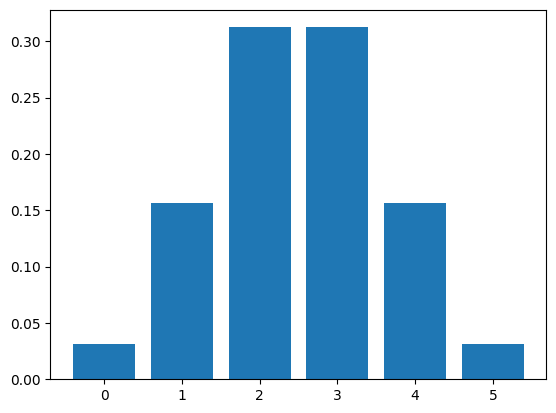

In [18]:
plt.bar(r_values,dist)

##### Bernoulli

In [19]:
from scipy.stats import bernoulli

In [20]:
bernoulli(p=0.2).pmf([0,1])

array([0.8, 0.2])

##### Poisson 

In [21]:
from scipy.stats import poisson


In [22]:
poisson.pmf(10, 5) # 10 = number of occurences and 5=event

np.float64(0.018132788707821854)

##### Normal

<Axes: ylabel='Count'>

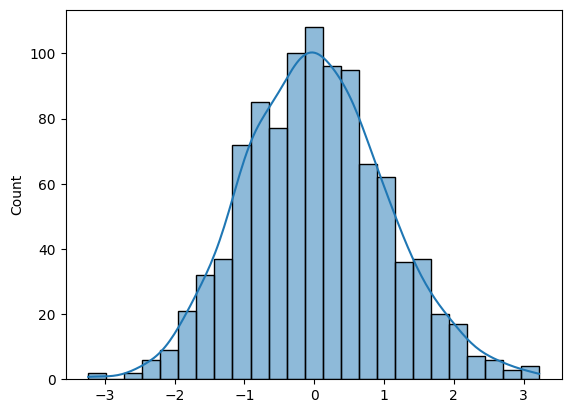

In [23]:
sns.histplot(np.random.normal(size=1000), kde=True)

##### Uniform continuous

<Axes: ylabel='Count'>

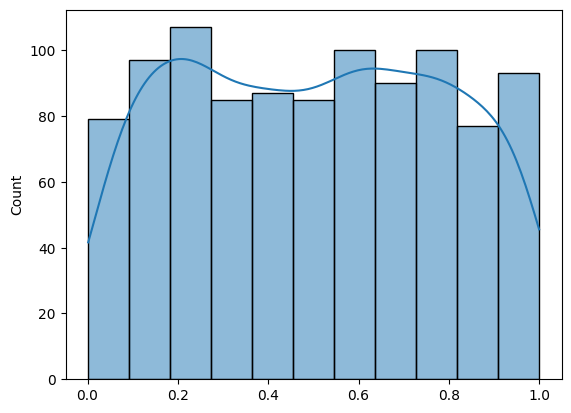

In [24]:
sns.histplot(np.random.uniform(size=1000), kde=True)